## TASK 1: PROBLEM STATEMENT AND PROJECT OVERVIEW



*   For investor to properly manage their portfolio, they need to visualize datasets, find useful patterns, and gain valuable insights such as stock daily retirn and risks.
*   In this project, we will use Python to perform stock data visualization and stock return calculation




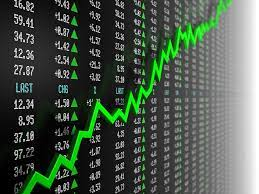

# TASK 2: IMPORT DATASETS AND LIBRARIES

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import yfinance as yf



Here is the list of the stocks considered:
- BA: Boeing
- AAPL: Apple 
- MSFT: Microsoft
- AMZN: Amazon
- TSLA: Tesla
- SPY: US Stock market
- WMT: Wallmart
-GOOG: Google

In [ ]:
stocks = ["BA","AAPL", "MSFT","AMZN","TSLA","SPY","WMT","GOOG"]

In [ ]:
data = yf.download(stocks, start = "2012-01-01", end = "2022-12-02")

[*********************100%***********************]  8 of 8 completed


In [ ]:
stocks_df = data.loc[:,"Close"].copy()

In [ ]:
stocks_df.reset_index(inplace = True)

In [ ]:
#sort data by date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

Date        AAPL       AMZN          BA        GOOG        MSFT  \
0    2012-01-03   14.686786   8.951500   74.220001   16.573130   26.770000   
1    2012-01-04   14.765714   8.875500   74.330002   16.644611   27.400000   
2    2012-01-05   14.929643   8.880500   73.529999   16.413727   27.680000   
3    2012-01-06   15.085714   9.130500   73.980003   16.189817   28.110001   
4    2012-01-09   15.061786   8.928000   74.529999   15.503389   27.740000   
...         ...         ...        ...         ...         ...         ...   
2743 2022-11-25  148.110001  93.410004  178.360001   97.599998  247.490005   
2744 2022-11-28  144.220001  93.949997  171.830002   96.250000  241.759995   
2745 2022-11-29  141.169998  92.419998  175.320007   95.440002  240.330002   
2746 2022-11-30  148.029999  96.540001  178.880005  101.449997  255.139999   
2747 2022-12-01  148.309998  95.500000  175.779999  101.279999  254.690002   

             SPY        TSLA         WMT  
0     127.500000    1.872000   60.330002  
1     127.699997    1.847333   59.709999  
2     128.039993    1.808000   59.419998  
3     127.709999    1.794000   59.000000  
4     128.020004    1.816667   59.180000  
...          ...         ...         ...  
2743  402.329987  182.860001  153.070007  
2744  395.910004  182.919998  153.509995  
2745  395.230011  180.830002  152.970001  
2746  407.679993  194.699997  152.419998  
2747  407.380005  194.699997  153.369995  

[2748 rows x 9 columns]

In [ ]:
#print out the number of stocks
print(f"Total number of stocks: {len(stocks_df.columns[1:])}")

Total number of stocks: 8


In [ ]:
#print the name of stocks
for i in stocks_df.columns[1:]:
  print(i)

AAPL
AMZN
BA
GOOG
MSFT
SPY
TSLA
WMT


## QUESTION TO FIND OUT:
- what is average return of SPY?
- Which stock or index has the minimum dispertion from the mean in dollar value?
- What is maximize price for AMZN stock over the specified time period?

In [ ]:
stocks_df.mean()

AAPL     58.064483
AMZN     67.969716
BA      190.438435
GOOG     55.135850
MSFT    112.550833
SPY     260.758348
TSLA     66.074714
WMT      95.215339
dtype: float64

As we can see average return for SPY is 260.76$

In [ ]:
stocks_df.std()

AAPL    47.683373
AMZN    54.087391
BA      93.610772
GOOG    35.758022
MSFT    89.291720
SPY     91.252601
TSLA    99.439143
WMT     28.296087
dtype: float64

Tsla has max standard diviation

In [ ]:
stocks_df.describe()

AAPL         AMZN           BA         GOOG         MSFT  \
count  2748.000000  2748.000000  2748.000000  2748.000000  2748.000000   
mean     58.064483    67.969716   190.438435    55.135850   112.550833   
std      47.683373    54.087391    93.610772    35.758022    89.291720   
min      13.947500     8.796500    67.239998    13.924059    26.370001   
25%      24.112499    17.907751   128.112495    27.373970    42.907500   
50%      37.317499    48.251249   153.389999    46.361500    70.049999   
75%      74.428749    99.055000   239.607498    68.023247   167.875004   
max     182.009995   186.570496   440.619995   150.709000   343.109985   

               SPY         TSLA          WMT  
count  2748.000000  2748.000000  2748.000000  
mean    260.758348    66.074714    95.215339  
std      91.252601    99.439143    28.296087  
min     127.500000     1.519333    56.419998  
25%     194.982498    13.485667    73.129997  
50%     242.200005    17.332999    82.605000  
75%     310.817490    46.024667   119.442501  
max     477.709991   409.970001   159.869995

Max price for amazon is 186.57$

# TASK 3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [ ]:
#check if data contains any null values
stocks_df.isnull().sum()

Date    0
AAPL    0
AMZN    0
BA      0
GOOG    0
MSFT    0
SPY     0
TSLA    0
WMT     0
dtype: int64

In [ ]:
#getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 2747
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2748 non-null   datetime64[ns]
 1   AAPL    2748 non-null   float64       
 2   AMZN    2748 non-null   float64       
 3   BA      2748 non-null   float64       
 4   GOOG    2748 non-null   float64       
 5   MSFT    2748 non-null   float64       
 6   SPY     2748 non-null   float64       
 7   TSLA    2748 non-null   float64       
 8   WMT     2748 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 214.7 KB


In [ ]:
# Define a function to plot the entire dataframe
#the funtion takes in a dataframe df as an input argument and does not return anything back!
#the function performs data visualization

def show_plot(df, fig_title):
  df.plot( x = 'Date',figsize = (15,7), title = fig_title)
  plt.grid()
  plt.show()

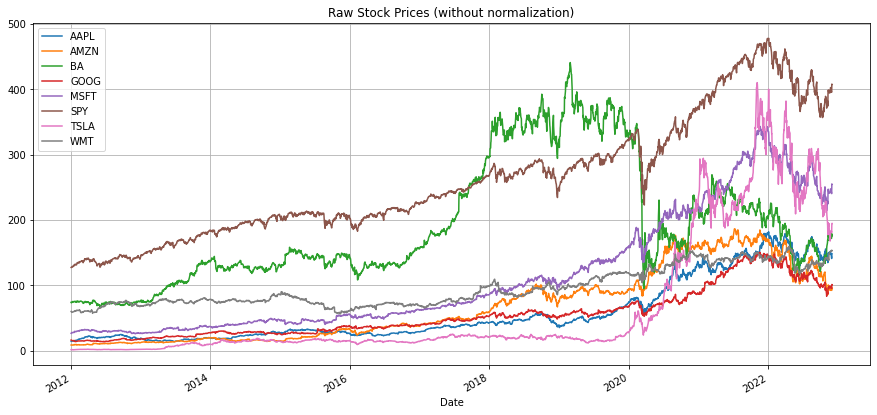

In [ ]:
#plot the data
show_plot(stocks_df, "Raw Stock Prices (without normalization)")

we can see in 2020, the stocks market went up a lot but since 2022, the stock markets has been decreasing value due to potential recession. Also SPY has been beat all individual stocks in terms of return.

In [ ]:
#print out with normalization
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x


In [ ]:
normalize(stocks_df)

Date       AAPL       AMZN        BA      GOOG      MSFT       SPY  \
0    2012-01-03   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1    2012-01-04   1.005374   0.991510  1.001482  1.004313  1.023534  1.001569   
2    2012-01-05   1.016536   0.992068  0.990703  0.990382  1.033993  1.004235   
3    2012-01-06   1.027162   1.019997  0.996766  0.976871  1.050056  1.001647   
4    2012-01-09   1.025533   0.997375  1.004177  0.935453  1.036235  1.004078   
...         ...        ...        ...       ...       ...       ...       ...   
2743 2022-11-25  10.084576  10.435123  2.403126  5.889051  9.245050  3.155529   
2744 2022-11-28   9.819712  10.495447  2.315144  5.807593  9.031004  3.105176   
2745 2022-11-29   9.612042  10.324526  2.362167  5.758719  8.977587  3.099843   
2746 2022-11-30  10.079128  10.784785  2.410132  6.121354  9.530818  3.197490   
2747 2022-12-01  10.098193  10.668603  2.368364  6.111097  9.514008  3.195137   

            TSLA       WMT  
0       1.000000  1.000000  
1       0.986823  0.989723  
2       0.965812  0.984916  
3       0.958333  0.977955  
4       0.970442  0.980938  
...          ...       ...  
2743   97.681625  2.537212  
2744   97.713675  2.544505  
2745   96.597224  2.535554  
2746  104.006410  2.526438  
2747  104.006410  2.542184  

[2748 rows x 9 columns]

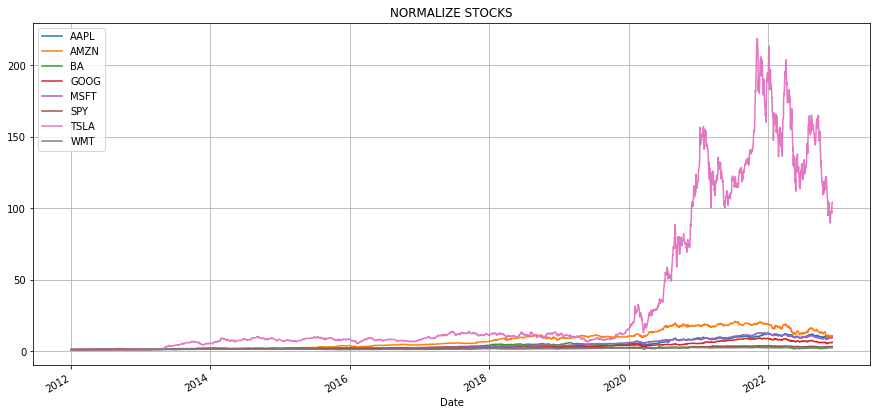

In [ ]:
show_plot(normalize(stocks_df), "NORMALIZE STOCKS")

# TASK 4: PERFORM INTERACTIVE DATA VISUALIZATION

In [ ]:
#function to perform an interactive data plotting using plotly express
#plotly.express which is imported as px includes function that can plot interactive plots easily and effectively
#every plotly express function uses graph objects internally and returns a plotly.graph_objects.figure instance
def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y =df[i] ,name = i)

  fig.show()

In [ ]:
#plot interactive chart
interactive_plot(stocks_df, 'Price')

In [ ]:
#plot normalized stock data in interactive way
interactive_plot(normalize(stocks_df),"Normalize Price")

It seems that most stocks experienced massive drops in 2022, just say that you own 100 shares of SPY and you bought them on 1/11/2021, how much did you lose by 1/12/2022?

In [ ]:
stocks_df[stocks_df['Date'] == '2021-11-01']['SPY']

2474    460.040009
Name: SPY, dtype: float64

In [ ]:
stocks_df[stocks_df['Date'] == '2022-12-01']['SPY']

2747    407.380005
Name: SPY, dtype: float64

In [ ]:
print(f" loss = {(407- 460)*100}")

 loss = -5300


# TASK 5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [ ]:
#let's calculate daily return for a single security
#let's take SPY as example
df_spy = stocks_df['SPY']
df_spy

0       127.500000
1       127.699997
2       128.039993
3       127.709999
4       128.020004
           ...    
2743    402.329987
2744    395.910004
2745    395.230011
2746    407.679993
2747    407.380005
Name: SPY, Length: 2748, dtype: float64

In [ ]:
df_daily_return = df_spy.copy()
for j in range(1, len(df_spy)):
  df_daily_return[j] =( (df_spy[j] - df_spy[j-1])/df_spy[j -1]) *100

df_daily_return[0] = 0
df_daily_return

0       0.000000
1       0.156860
2       0.266246
3      -0.257727
4       0.242742
          ...   
2743   -0.022371
2744   -1.595701
2745   -0.171754
2746    3.150060
2747   -0.073584
Name: SPY, Length: 2748, dtype: float64

In [ ]:
#how about daily return for TSLA?
df_tsla = stocks_df['TSLA']
df_tsla_return = df_tsla.copy()
for j in range(1, len(df_tsla)):
  df_tsla_return[j] =( (df_tsla[j] - df_tsla[j-1])/df_tsla[j -1]) *100

df_tsla_return[0] = 0
df_tsla_return

0       0.000000
1      -1.317683
2      -2.129177
3      -0.774333
4       1.263486
          ...   
2743   -0.185588
2744    0.032811
2745   -1.142574
2746    7.670185
2747    0.000000
Name: TSLA, Length: 2748, dtype: float64

# TASK 6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [ ]:
#let's define a function to calculate stocks daily returns ( for all stocks)
def daily_return(df):
  df_daily_return = df.copy()
  # loop on columns 
  for i in df.columns[1:]:
    #loop for each row
    for j in range(1, len(df)):
      df_daily_return [i][j] = ((df[i][j] - df[i][j-1])/df[i][j-1]) *100

    df_daily_return[i][0] = 0
  return df_daily_return







In [ ]:
#get the daily return
stocks_daily_return = daily_return(stocks_df)

In [ ]:
stocks_daily_return

Date      AAPL      AMZN        BA      GOOG      MSFT       SPY  \
0    2012-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    2012-01-04  0.537408 -0.849022  0.148209  0.431311  2.353377  0.156860   
2    2012-01-05  1.110200  0.056336 -1.076286 -1.387143  1.021900  0.266246   
3    2012-01-06  1.045381  2.815157  0.612001 -1.364159  1.553469 -0.257727   
4    2012-01-09 -0.158618 -2.217835  0.743438 -4.239875 -1.316261  0.242742   
...         ...       ...       ...       ...       ...       ...       ...   
2743 2022-11-25 -1.959361 -0.764893  2.007432 -1.234569 -0.036350 -0.022371   
2744 2022-11-28 -2.626426  0.578089 -3.661134 -1.383195 -2.315249 -1.595701   
2745 2022-11-29 -2.114827 -1.628525  2.031080 -0.841556 -0.591493 -0.171754   
2746 2022-11-30  4.859390  4.457913  2.030571  6.297144  6.162359  3.150060   
2747 2022-12-01  0.189150 -1.077275 -1.733009 -0.167568 -0.176373 -0.073584   

          TSLA       WMT  
0     0.000000  0.000000  
1    -1.317683 -1.027686  
2    -2.129177 -0.485682  
3    -0.774333 -0.706830  
4     1.263486  0.305085  
...        ...       ...  
2743 -0.185588  0.426459  
2744  0.032811  0.287442  
2745 -1.142574 -0.351764  
2746  7.670185 -0.359550  
2747  0.000000  0.623276  

[2748 rows x 9 columns]

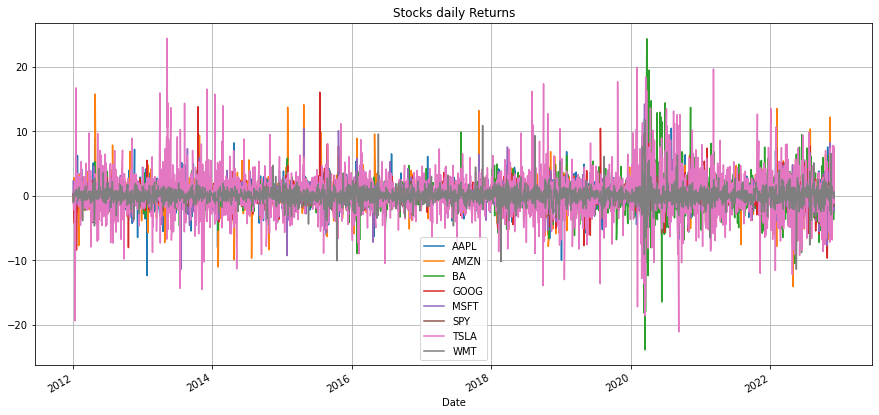

In [ ]:
#plot the return vs time usingboth static and interactive plots
show_plot(stocks_daily_return,"Stocks daily Returns")

In [ ]:
interactive_plot(stocks_daily_return,"Stock Daily Return")

In [ ]:
#what is maximum daily return


# TASK 7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS

In [ ]:
#daily return correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

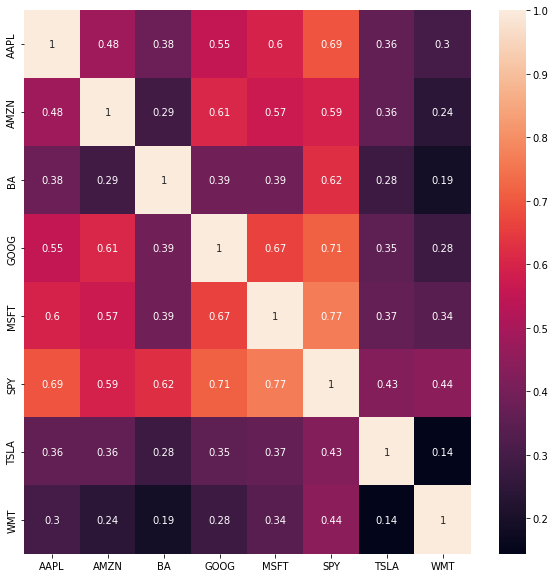

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

- There is very strong correlation between SPY and GOOG and MSFT.
- There is very low or no correlation between AMZN and Boeing. It is easy to understand because they are 2 different industries.





# Task 8: PLOT THE HISTOGRAM FOR DAILY RETURNS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47934883a0>,
      dtype=object)

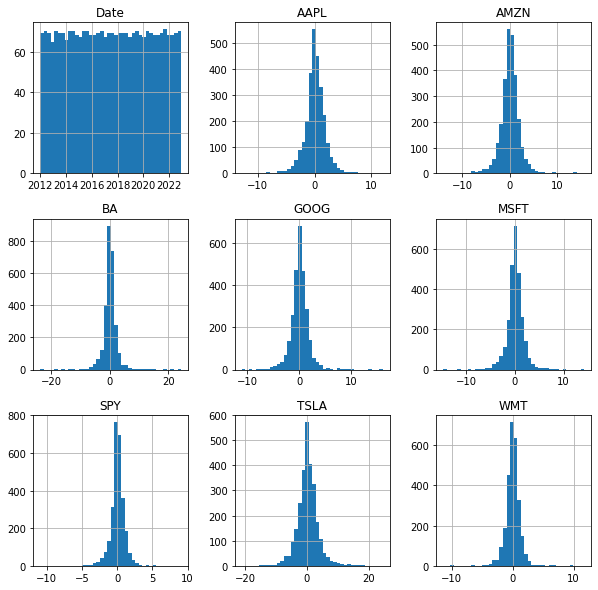

In [ ]:
#histogram of daily return
#stock returns are normally distributed with zero mean
#notice how Tesla standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize = (10,10), bins = 40)

In [ ]:
#group all data returns together in a list
#make copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()
df_hist = df_hist.drop(columns = ['Date'])

data = []
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)

data

[array([ 0.        ,  0.53740822,  1.11020022, ..., -2.11482667,
         4.85938988,  0.18915002]),
 array([ 0.        , -0.84902211,  0.05633615, ..., -1.62852457,
         4.4579126 , -1.07727461]),
 array([ 0.        ,  0.14820885, -1.07628553, ...,  2.0310804 ,
         2.03057119, -1.73300873]),
 array([ 0.        ,  0.43131084, -1.38714294, ..., -0.84155591,
         6.29714413, -0.16756843]),
 array([ 0.        ,  2.35337747,  1.02190033, ..., -0.59149268,
         6.16235903, -0.17637256]),
 array([ 0.        ,  0.15686035,  0.26624616, ..., -0.17175436,
         3.1500598 , -0.07358413]),
 array([ 0.        , -1.31768295, -2.12917686, ..., -1.142574  ,
         7.67018469,  0.        ]),
 array([ 0.        , -1.02768561, -0.48568233, ..., -0.35176425,
        -0.35954962,  0.62327579])]

In [ ]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()